In [ ]:
from analyse_utils import *

COMMITS_DATA_PATH = "../data/commits/*.json"
ISSUES_DATA_PATH = "../data/issues/*.json"
CSV_FILE_PATH = "../dataset/dataset_filtrado.csv"
PULL_FILES_DATA_PATH = "../data/pull_request/*.json"

In [2]:
# Step 1: Load and preprocess commit data
print("Loading commit data...")
commits_df = load_all_commits(COMMITS_DATA_PATH)
print(f"Total commits loaded: {len(commits_df)}")

Loading commit data...
Total commits loaded: 127118


In [3]:
# Step 2: Enrich commit data with additional metrics
print("Enriching commit data...")
commits_df = enrich_commit_data(commits_df)

Enriching commit data...


In [4]:
# Step 3: Load and preprocess issue data
print("Loading issue data...")
issues_df = load_all_issues(ISSUES_DATA_PATH)
print(f"Total issues loaded: {len(issues_df)}")

Loading issue data...
Total issues loaded: 70391


In [5]:
# Step 4: Enrich issue data with additional metrics
print("Enriching issue data...")
issues_df = enrich_issue_data(issues_df)
# Filter issues with PRs
issues_with_prs = issues_df.loc[issues_df["is_pull_request"]]

Enriching issue data...


In [6]:
# Step 5: Load and process CSV data
print("Loading CSV data...")
csv_df = load_csv_data(CSV_FILE_PATH)
print(f"Total projects loaded from CSV: {len(csv_df)}")

print("Loading pull request data...")
prs_df = load_all_pull_requests(PULL_FILES_DATA_PATH)
print(f"Total pull requests loaded: {len(prs_df)}")

Loading CSV data...
Total projects loaded from CSV: 11
Loading pull request data...
Total pull requests loaded: 41222


In [7]:
# Step 6: Enrich CSV data
print("Enriching CSV data...")
csv_df = enrich_csv_data_two_groups(csv_df)

Enriching CSV data...
Median: 4.0


Analyzing programming language usage...


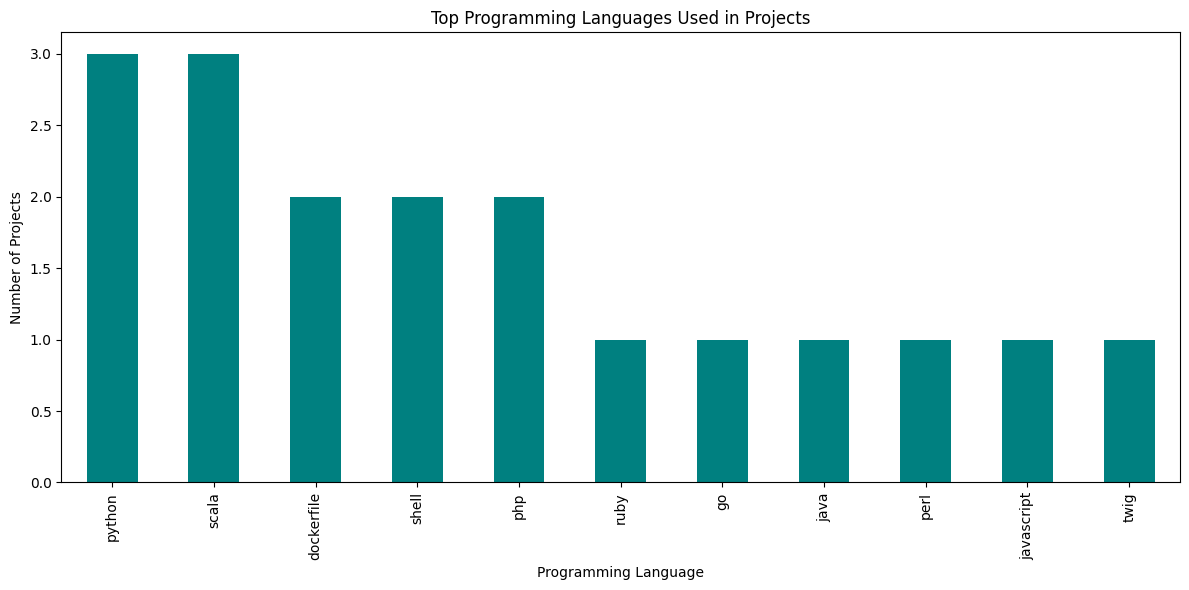

Analyzing microservice distribution...


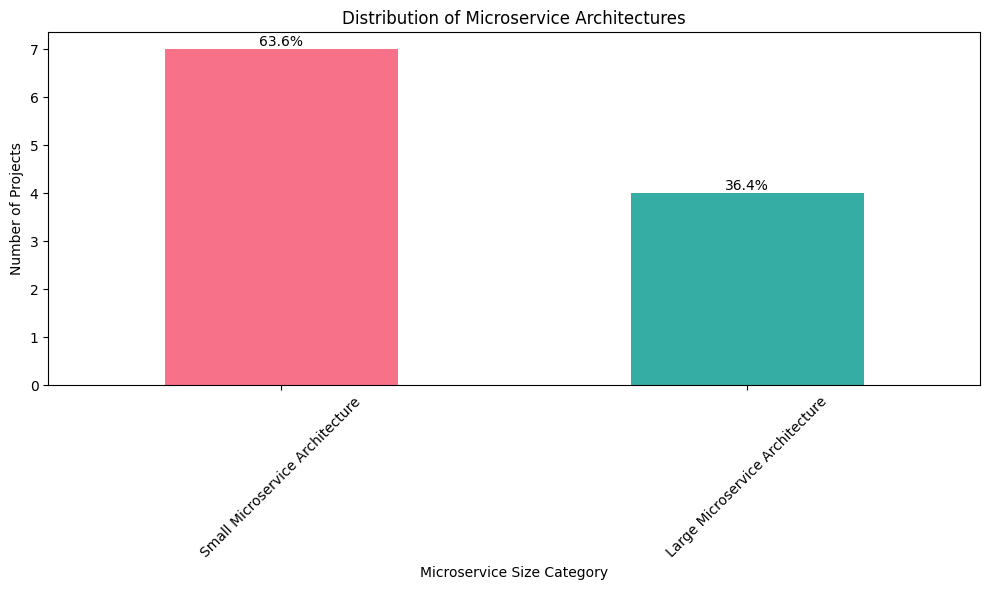

languages_list
python        3
scala         3
dockerfile    2
shell         2
php           2
ruby          1
go            1
java          1
perl          1
javascript    1
twig          1
Name: count, dtype: int64

In [8]:
# ---------------------------
# CSV Data Analysis
# ---------------------------

# Analyze language usage
print("Analyzing programming language usage...")
language_counts = analyze_language_usage(csv_df)
plot_language_usage(language_counts)

# Analyze microservice distribution
print("Analyzing microservice distribution...")
microservice_counts = analyze_microservice_distribution(csv_df)
plot_microservice_distribution(microservice_counts)

analyze_language_usage(csv_df)

Analyzing community engagement over time...


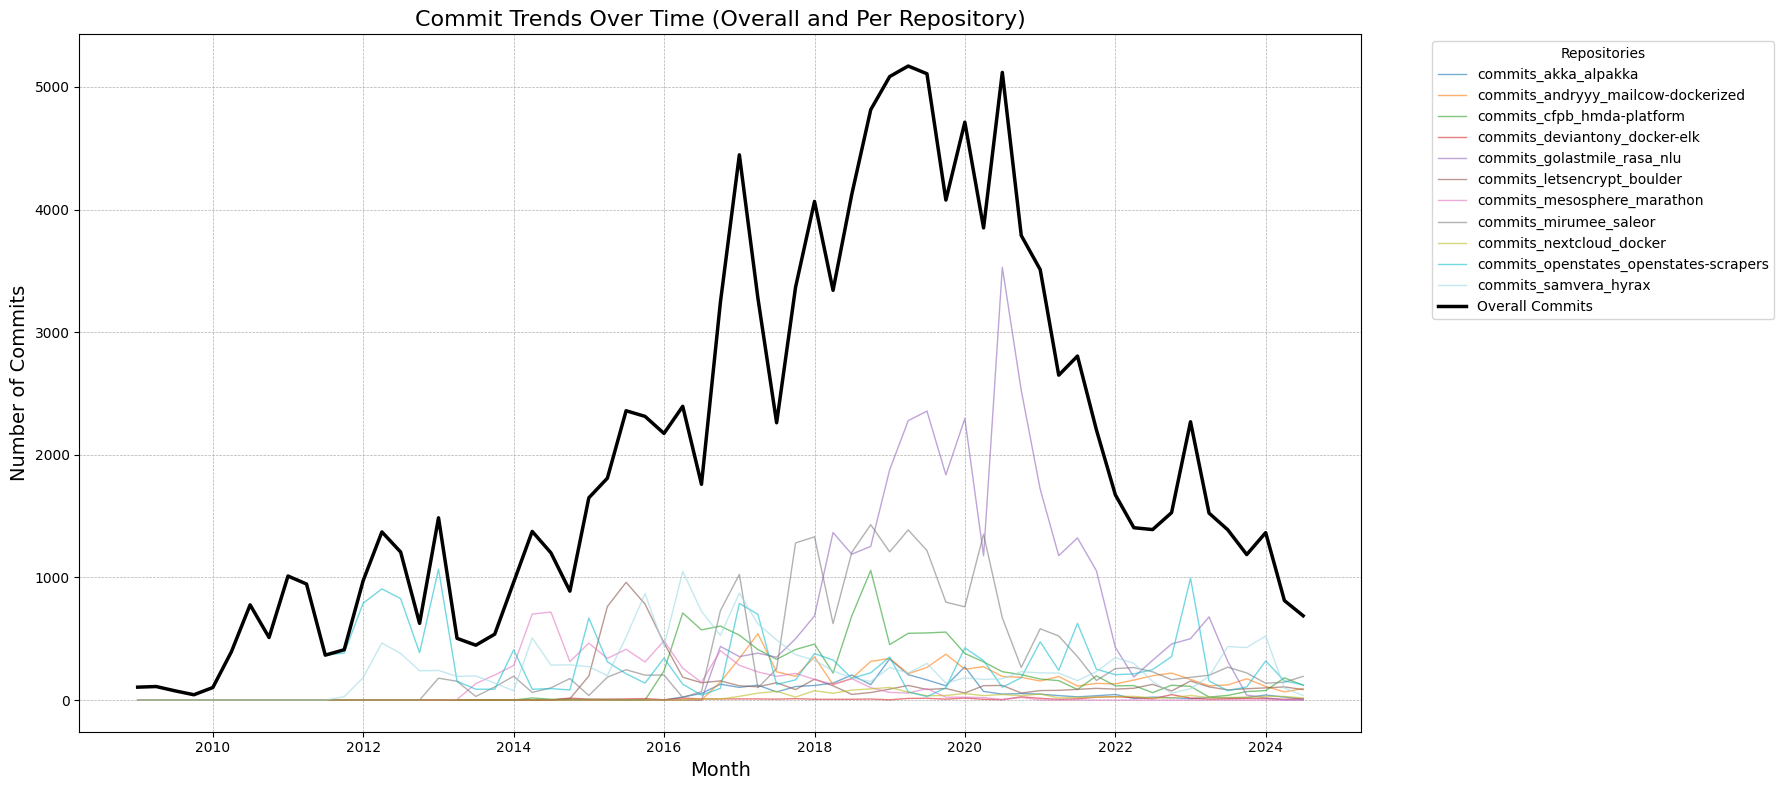

Identifying prominent authors...


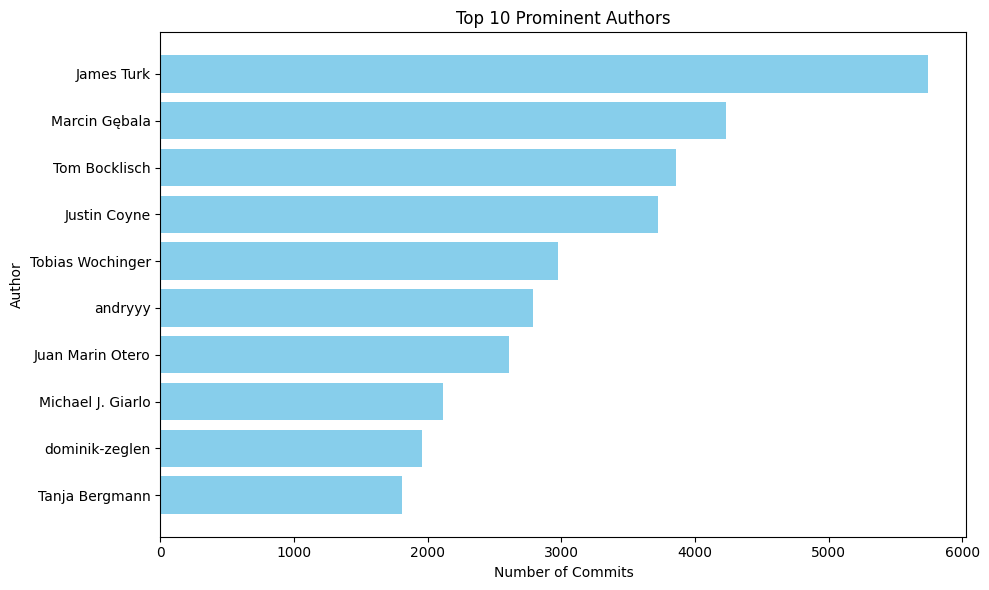

Analyzing cross-project contributions...


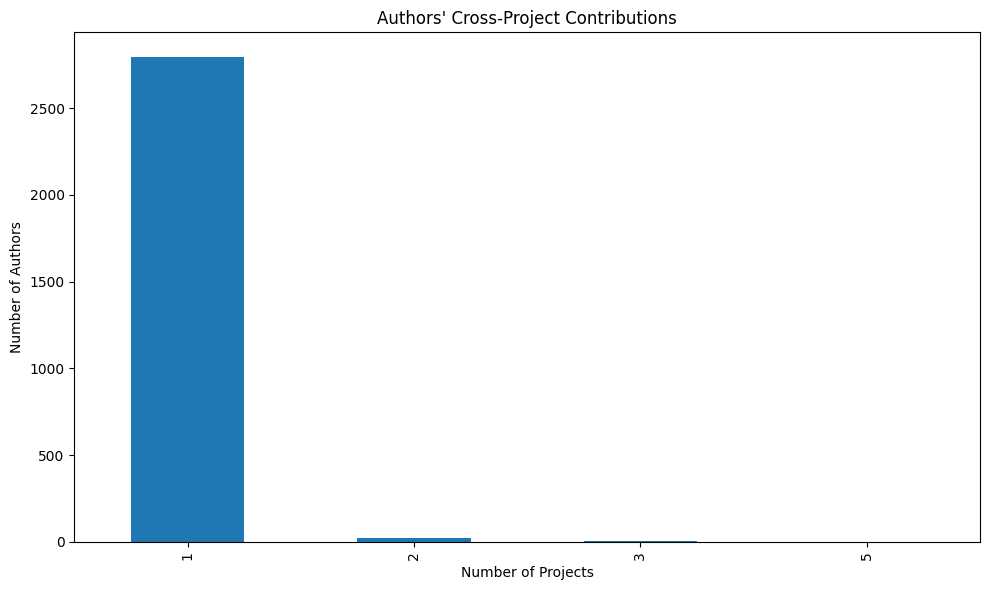

In [9]:
# ---------------------------
# RQ1 Analysis
# ---------------------------

# RQ1.1: Is community engagement increasing?
print("Analyzing community engagement over time...")
overall_commit_trends, repo_commit_trends = analyze_commit_trends(commits_df)
plot_commit_trends_per_repo(overall_commit_trends, repo_commit_trends)

# RQ1.2: Are there prominent authors or development teams?
print("Identifying prominent authors...")
prominent_authors = identify_prominent_authors(commits_df)
plot_prominent_authors(prominent_authors)

# RQ1.3: Do authors contribute to multiple projects?
print("Analyzing cross-project contributions...")
author_projects = analyze_author_cross_project_contributions(commits_df)
plot_author_project_contributions(author_projects)

Calculating average issue resolution time...
Average Issue Resolution Time: 10.66 days


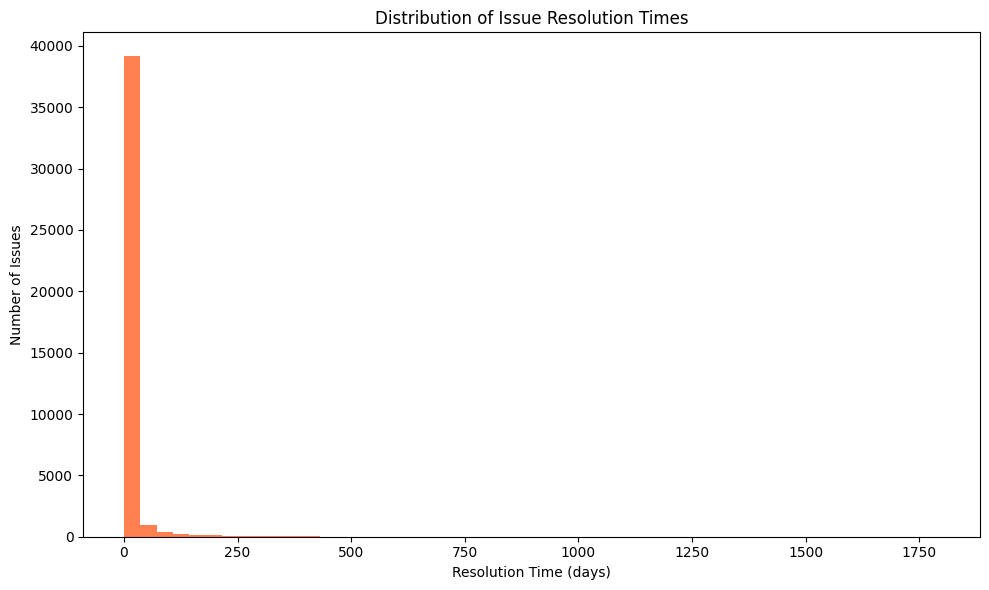

Removing outliers...
Removed outliers: 4131 rows


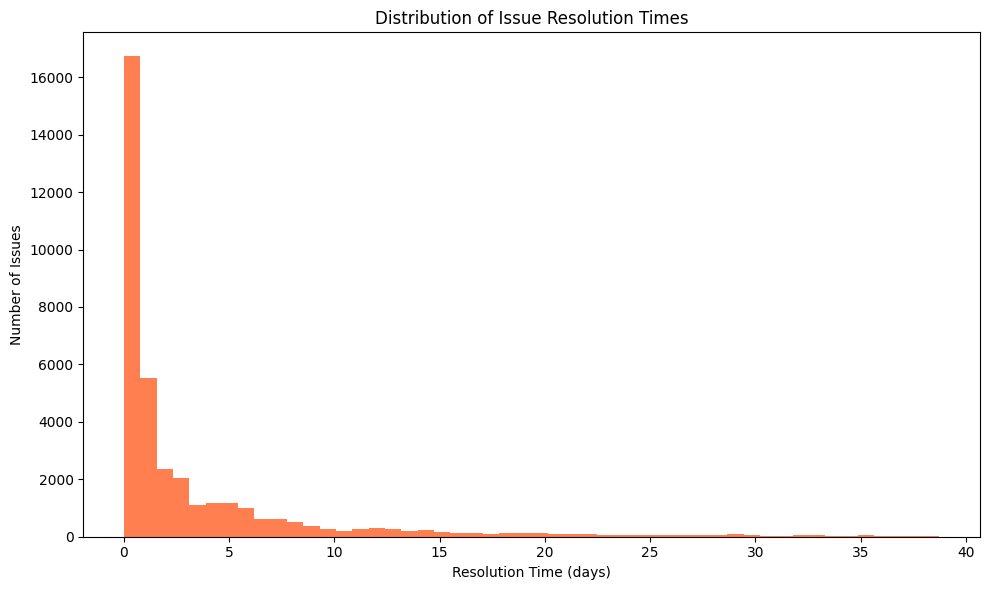

Analyzing impact of PR size on issue resolution time...


/home/sersasj/Uem/Mestrado/TESS-work/src/new_analyse.py:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues_df["pull_number"] = issues_df["pull_number"].astype(str)


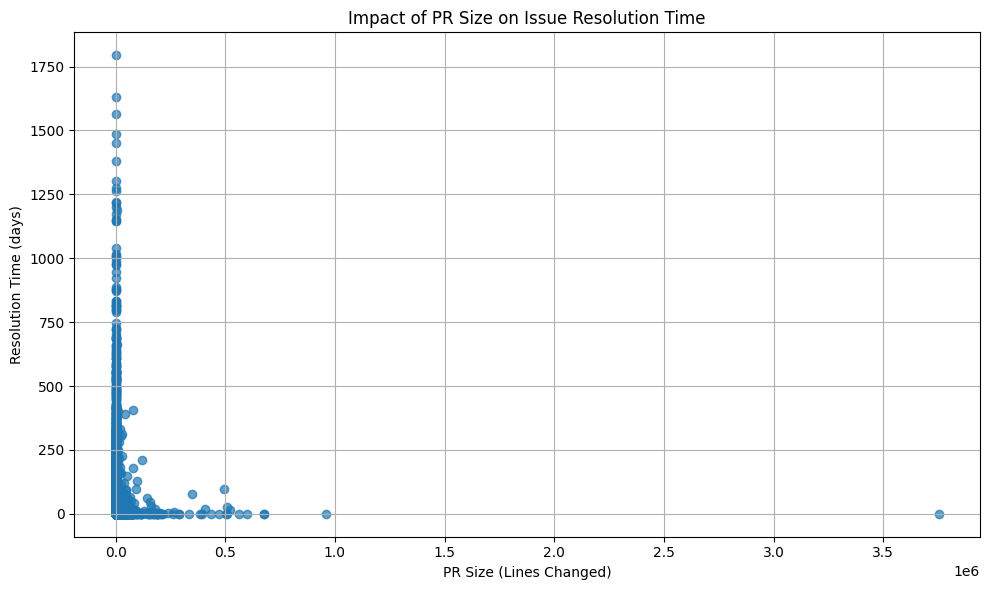

Removed outliers: 4121 rows
Removed outliers: 2623 rows
Plotting PR size vs. resolution time (without outliers)...


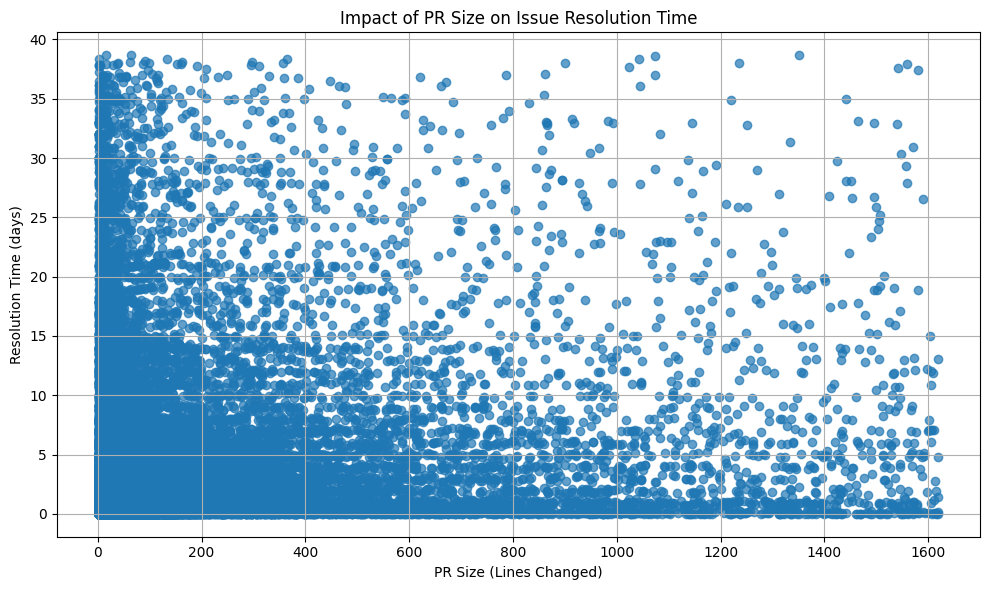

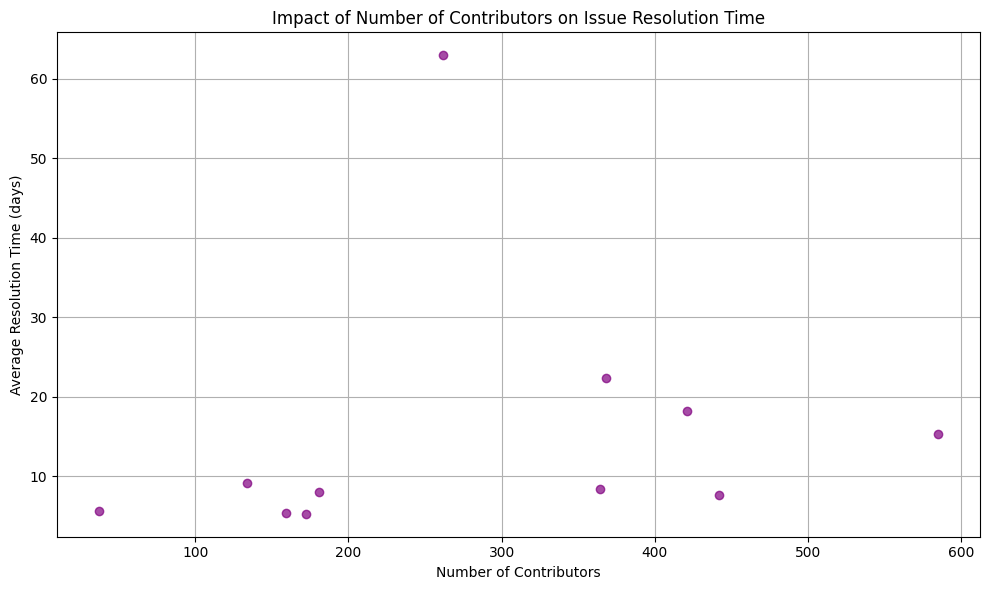

Calculating proportion of issues that are PRs...
Proportion of Issues that are PRs: 58.71%
Analyzing issue resolution time by microservice size...

Microservice Categories: ['Large Microservice Architecture' 'Small Microservice Architecture']

Groups for Kruskal-Wallis Test:
Large Microservice Architecture: 4 repos
Small Microservice Architecture: 7 repos

Kruskal-Wallis H-test Results:
Statistic: 6.0357, p-value: 0.0140

There is a statistically significant difference in average issue closure times between microservice size categories.

Dunn's Test Results (Adjusted p-values):
                                 Large Microservice Architecture  \
Large Microservice Architecture                         1.000000   
Small Microservice Architecture                         0.014019   

                                 Small Microservice Architecture  
Large Microservice Architecture                         0.014019  
Small Microservice Architecture                         1.000000  

Signific

/home/sersasj/Uem/Mestrado/TESS-work/src/new_analyse.py:730: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


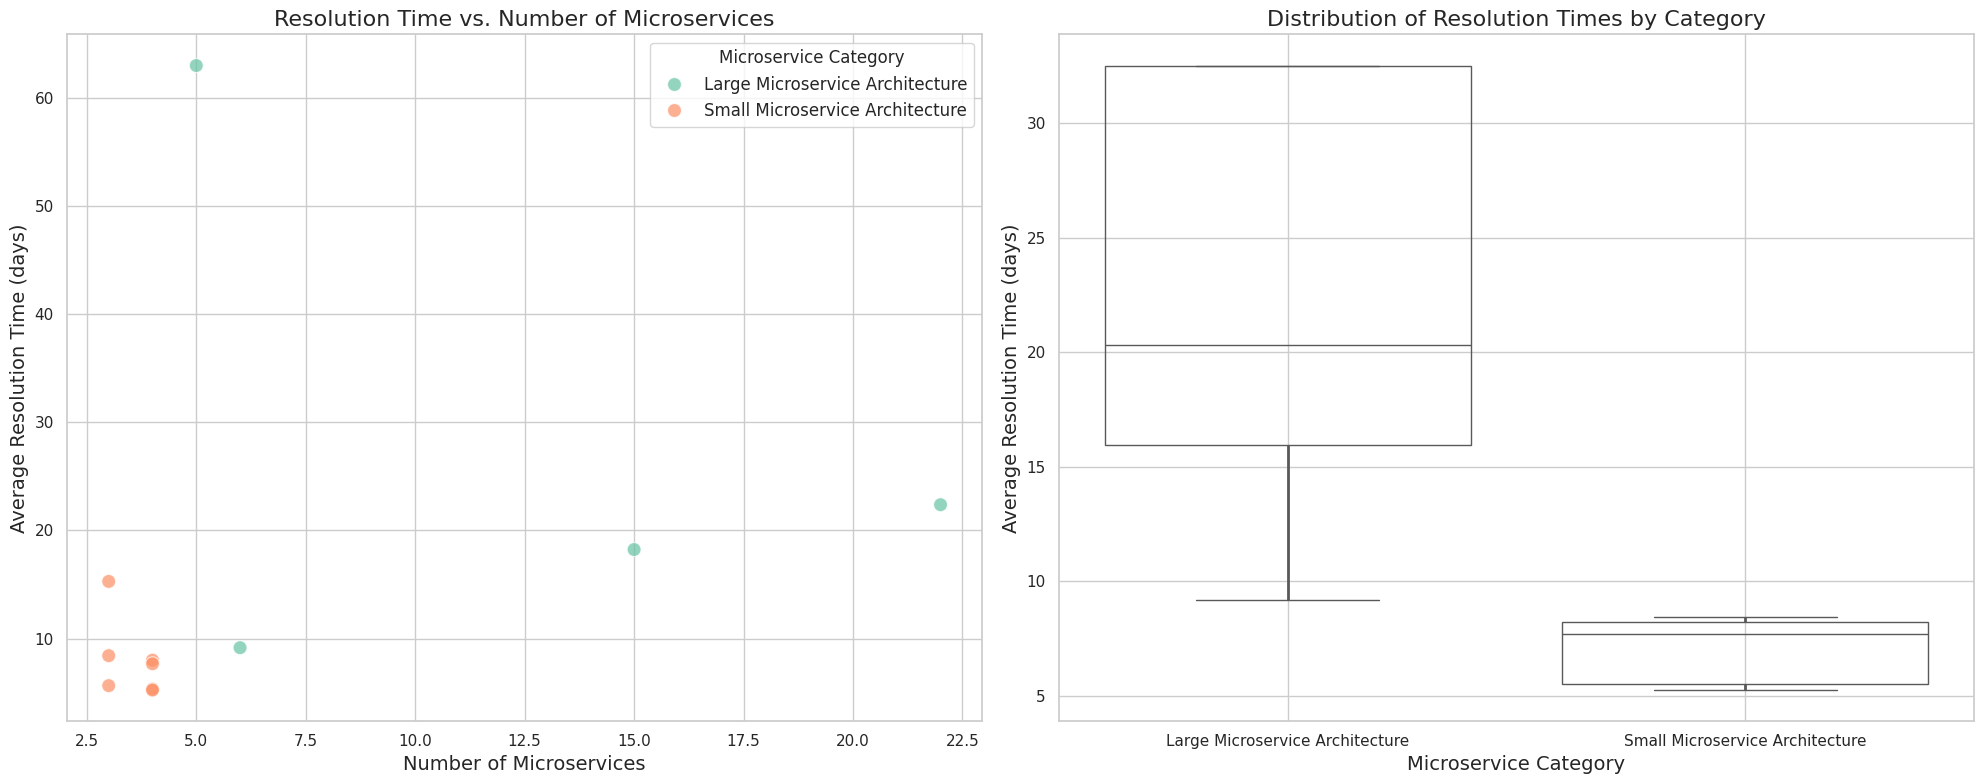

In [10]:
# ---------------------------
# RQ2 Analysis
# ---------------------------

# RQ2.1: What is the average issue resolution time?
print("Calculating average issue resolution time...")
avg_resolution_time = calculate_average_issue_resolution_time(issues_with_prs)
print(f"Average Issue Resolution Time: {avg_resolution_time:.2f} days")
plot_issue_resolution_time(issues_with_prs)
print("Removing outliers...")
plot_issue_resolution_time(
remove_outliers(issues_with_prs, "resolution_time", lower_percentile=0.05, upper_percentile=0.95)
)
# RQ2.3: Impact of PR size on issue resolution time
print("Analyzing impact of PR size on issue resolution time...")
impact_df = impact_of_pr_size_on_resolution_time(issues_with_prs, prs_df)
plot_pr_size_vs_resolution_time(impact_df)

impact_df_no_outliers = remove_outliers(impact_df, "resolution_time", lower_percentile=0.05, upper_percentile=0.95)
impact_df_no_outliers = remove_outliers(
impact_df_no_outliers, "total_changes", lower_percentile=0.05, upper_percentile=0.95
)

# Plot without outliers
print("Plotting PR size vs. resolution time (without outliers)...")
plot_pr_size_vs_resolution_time(impact_df_no_outliers)

# RQ2.4: Impact of Contributors size on issue resolution time
plot_contributor_count_vs_resolution_time(issues_with_prs)

# RQ2.5: Proportion of issues that are PRs
print("Calculating proportion of issues that are PRs...")
pr_issue_proportion = calculate_pr_issue_proportion(issues_df)
print(f"Proportion of Issues that are PRs: {pr_issue_proportion:.2%}")

# RQ2.6: Is there a statistical difference between issue closure times with repository microservice size?
print("Analyzing issue resolution time by microservice size...")
average_df = analyze_issue_resolution_time_by_microservice_size(issues_with_prs, csv_df)
plot_service_numbers_vs_resolution_time(average_df)